In [97]:
import numpy as np

n = 100
d = 50
mu = np.zeros(d)
X = np.random.multivariate_normal(mu, np.identity(d), n)
print(X)


[[-0.31736376 -1.58561304 -1.41409998 ...  0.04384316 -1.39394347
   0.04325313]
 [-0.39080287  0.94503278 -0.56390219 ... -0.13613483  0.17958464
   0.02221017]
 [ 0.41608488 -1.42188324  0.95440505 ... -0.8143646  -0.43054554
  -0.15610626]
 ...
 [ 0.53523454 -1.16003177 -0.18898108 ...  0.05240793 -0.71374363
   0.8879194 ]
 [ 0.64591003  1.39555765 -1.30359658 ...  1.15462085  0.65608944
   0.45726147]
 [ 1.02830008 -2.37052005 -0.01752785 ... -1.38818774  1.29822129
   0.159719  ]]


In [98]:
# Create epsilon vector

epsilon = np.random.chisquare(1, n) - 1  # Centered Chi-square distribution

# Define parameter

theta_star = np.array([10, 5, -3, -2, -1] + [0] * (d - 5))

# Create vector Y
Y = X @ theta_star + epsilon

print(epsilon)
print(X.shape)
print(theta_star.shape)
print(epsilon.shape)
print(Y.shape)
print(Y)


[ 6.74803433e-01 -8.40756265e-02  3.69137011e-01  1.73792797e-01
 -6.02785866e-01 -1.13539993e-02 -3.57989208e-01 -6.72149009e-01
 -5.79770875e-01  1.15060923e+00 -7.48955463e-01 -7.51278481e-01
 -8.40077079e-01 -6.52231516e-01 -2.20490473e-01 -8.97045246e-01
 -9.99602877e-01 -1.91040874e-01 -1.14160087e-02 -7.48004648e-01
 -9.99833420e-01 -8.03347576e-01  2.08999075e+00 -5.54845532e-01
 -1.88693780e-01 -9.47652941e-01  5.17231025e-01  1.18356870e+00
 -9.96264529e-01  1.20862015e+00 -8.11485681e-01 -8.18497986e-01
 -6.97417557e-01 -9.79877764e-01  3.06651839e-01 -9.98617652e-01
  3.40154985e+00 -7.74493435e-01 -2.89327552e-03 -3.58473668e-01
 -9.88819023e-01  7.73952069e-01 -4.86322243e-01 -9.98689476e-01
 -9.25941587e-01 -9.97634349e-01 -9.91784764e-01 -9.68964223e-01
 -2.84678796e-01  2.66774051e-01  5.47600402e+00  2.05563354e-01
 -7.39129495e-01 -9.81950331e-01  3.02012088e-02 -9.52283888e-01
 -9.98532781e-01 -9.95848607e-01 -9.64442707e-01 -8.74551395e-01
 -7.03800799e-01 -7.13527

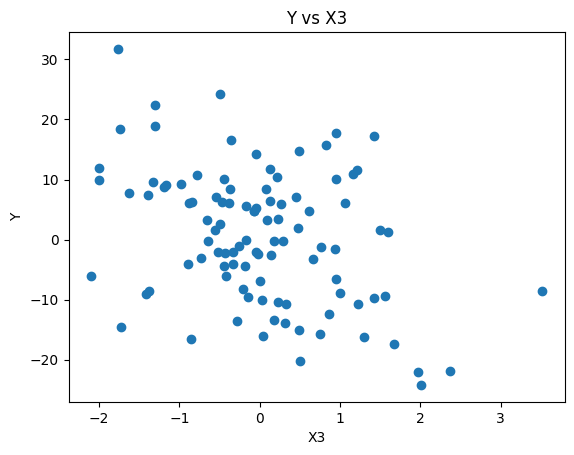

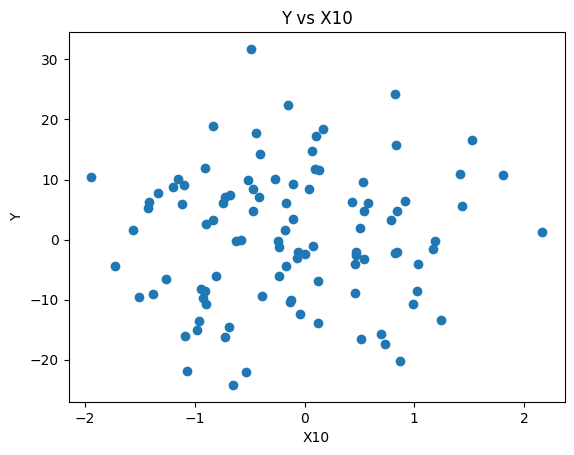

In [99]:
# Graphs

import matplotlib.pyplot as plt

plt.scatter(X[:, 2], Y)  # Y vs X3
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Y vs X3')
plt.show()

plt.scatter(X[:, 9], Y)  # Y vs X10
plt.xlabel('X10')
plt.ylabel('Y')
plt.title('Y vs X10')
plt.show()


In [100]:
# B:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X, Y)
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [ 9.90538933e+00  5.05640730e+00 -2.89226959e+00 -1.96459013e+00
 -1.17092672e+00 -4.18440242e-02  3.63389428e-02  4.86546201e-02
 -2.24534928e-01 -2.76588910e-01  2.35478896e-01  1.07341734e-01
  1.04311009e-01 -4.07064012e-01 -1.21492717e-01 -7.59818174e-02
 -2.64133553e-02  9.03449318e-03  1.78128337e-02  2.26126761e-02
 -4.94328661e-02  1.69239326e-01 -6.84559662e-02  4.32124556e-02
 -5.46495746e-02  6.81880637e-02  2.44577474e-02 -1.89448379e-01
  2.43886673e-01 -1.95471325e-01 -5.84520150e-02 -9.84230688e-02
 -1.29088210e-01 -2.95392072e-03 -3.82258655e-02 -7.66239682e-02
 -8.13279092e-02 -3.22104561e-02  5.88335803e-02  1.00627761e-01
  2.04621265e-01 -1.47041980e-02 -1.20291928e-01 -6.57294224e-02
  1.25003957e-01  5.49691632e-02 -5.53174130e-02  1.05264426e-01
  1.69466203e-01 -1.19895536e-01]
Intercept: -0.18436925756297912


In [101]:
# Rank of Design Matrix:

rank = np.linalg.matrix_rank(X)
print("Rank of the design matrix X:", rank)


Rank of the design matrix X: 50


In [102]:
# Quadratic Risk Function

def quadratic_risk(theta_hat, theta_star):
    return np.sum((theta_hat - theta_star) ** 2)

theta_hat = model.coef_
risk = quadratic_risk(theta_hat, theta_star)
print("Quadratic Risk:", risk)


Quadratic Risk: 0.8268209529482504


In [103]:
# Reproduce steps with different mu values:

mu_new = np.array([0] * 5 + [10] * (d-5))
X_new = np.random.multivariate_normal(mu_new, np.identity(d), n)
Y_new = X_new @ theta_star + epsilon

model.fit(X_new, Y_new)
new_coefficients = model.coef_
print("New Coefficients:", new_coefficients)


New Coefficients: [ 1.00360674e+01  5.08841792e+00 -2.99194387e+00 -2.09326728e+00
 -1.15687855e+00 -1.03313909e-02 -9.07940492e-02  1.72671807e-01
 -2.95502104e-01 -3.50883697e-02 -3.24799494e-01  8.66772613e-02
  2.13186963e-01 -1.09529293e-01 -6.16328857e-02 -1.12849870e-01
 -2.10647935e-01 -2.18766910e-01 -1.28855312e-01 -1.86935107e-01
  2.29969186e-01  5.96182784e-02  7.49733347e-02  2.08537593e-01
  4.70148186e-02  3.45171317e-01 -1.03662414e-01  3.39058847e-01
 -8.52233444e-02 -2.16266515e-02  2.41745870e-02  3.31753657e-02
 -1.91772720e-01  7.87170471e-02  1.51745561e-02 -4.95623685e-02
  6.14302553e-02 -1.76337074e-01  9.18513378e-03 -2.09393691e-02
 -7.32897101e-02 -9.31030431e-02 -1.00618550e-01  1.08939234e-01
  2.20210404e-01  8.29661682e-02  1.64549262e-02  3.13724078e-01
 -1.07437137e-02 -2.06907911e-01]


In [104]:
d = 200
theta_star_200 = np.array([10, 5, -3, -2, -1] + [0] * (d - 5))
X_200 = np.random.multivariate_normal(np.zeros(d), np.identity(d), n)
Y_200 = X_200 @ theta_star_200 + epsilon

model.fit(X_200, Y_200)
coefficients_200 = model.coef_
print("Coefficients for d=200:", coefficients_200)
rank_200 = np.linalg.matrix_rank(X_200)
print("Rank of the design matrix X for d=200:", rank_200)


Coefficients for d=200: [ 5.19243895e+00  2.35388121e+00 -7.82035519e-01 -1.11472122e+00
 -4.47900739e-01  8.01807719e-02 -8.48594193e-01 -2.38589445e-02
  2.77973872e-01  1.49897837e-01  2.45655835e-03 -3.53138799e-01
 -1.21173540e-01  2.92600727e-01 -2.36212266e-01 -3.43018301e-01
  9.85302443e-01 -8.27721516e-01 -6.90842468e-01  4.52824275e-02
 -2.06761125e-01 -5.94264083e-01  8.44223168e-02  2.41995368e-01
  1.26555079e-01 -2.04820688e-01 -1.56314334e-02 -5.17731950e-01
 -2.51745557e-01 -4.11754553e-01  1.58425269e-01  2.93831831e-01
  2.87414353e-02 -5.34030613e-01  5.44738613e-01 -4.61549185e-01
  2.10577789e-01  1.70381103e-01 -8.51399756e-02 -1.61919660e-01
  1.19206634e+00 -3.88966035e-01 -4.87069030e-01 -3.21397384e-01
 -1.79255733e-01  1.65698278e-01 -3.10199179e-01 -4.02737718e-01
 -8.20578212e-03 -4.00878001e-01  8.57618615e-02 -4.84423515e-01
  1.62097130e-01  1.03297620e-02 -2.35056238e-01  2.16335910e-01
  3.40165134e-01 -7.20879504e-01  8.10310329e-03  7.56967447e-01
 

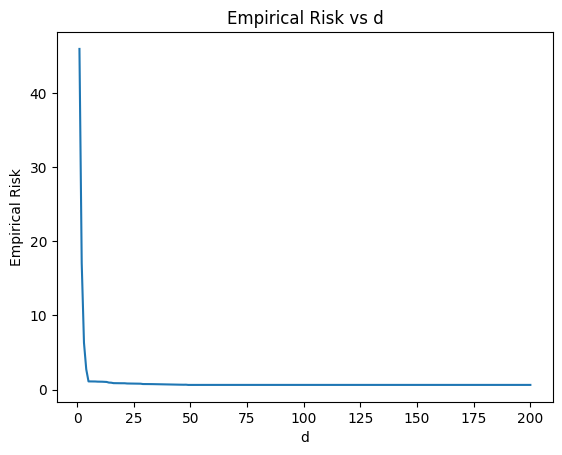

In [105]:
# C:

def empirical_risk(X, Y, theta_hat):
    return np.mean((Y - X @ theta_hat) ** 2)

risks = []
for d in range(1, 201):
    X_d = X[:, :d]
    model.fit(X_d, Y)
    theta_hat_d = model.coef_
    risk_d = empirical_risk(X_d, Y, theta_hat_d)
    risks.append(risk_d)

plt.plot(range(1, 201), risks)
plt.xlabel('d')
plt.ylabel('Empirical Risk')
plt.title('Empirical Risk vs d')
plt.show()


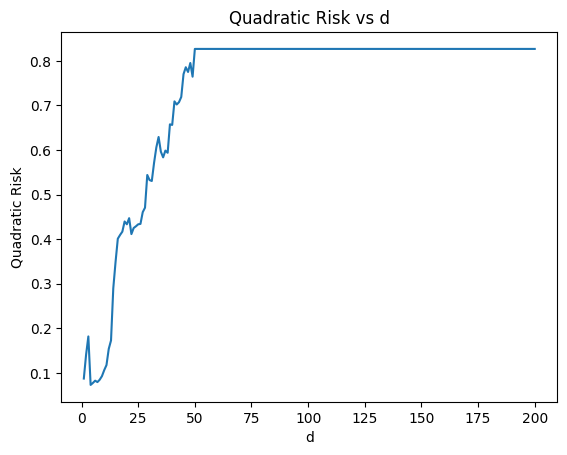

In [106]:
quadratic_risks = []
for d in range(1, 201):
    X_d = X[:, :d]
    model.fit(X_d, Y)
    theta_hat_d = model.coef_
    risk_d = quadratic_risk(theta_hat_d, theta_star[:d])
    quadratic_risks.append(risk_d)

plt.plot(range(1, 201), quadratic_risks)
plt.xlabel('d')
plt.ylabel('Quadratic Risk')
plt.title('Quadratic Risk vs d')
plt.show()


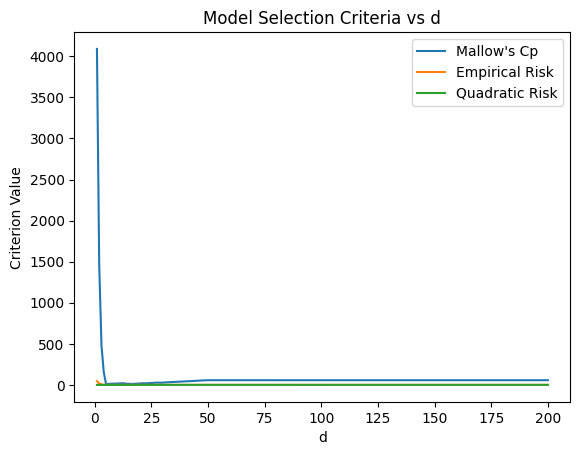

In [107]:
def mallow_cp(X, Y, theta_hat, sigma_squared):
    n, d = X.shape
    rss = np.sum((Y - X @ theta_hat) ** 2)
    return rss / sigma_squared - n + 2 * d

sigma_squared = np.var(epsilon)
cp_values = []
for d in range(1, 201):
    X_d = X[:, :d]
    model.fit(X_d, Y)
    theta_hat_d = model.coef_
    cp_d = mallow_cp(X_d, Y, theta_hat_d, sigma_squared)
    cp_values.append(cp_d)

plt.plot(range(1, 201), cp_values, label="Mallow's Cp")
plt.plot(range(1, 201), risks, label='Empirical Risk')
plt.plot(range(1, 201), quadratic_risks, label='Quadratic Risk')
plt.xlabel('d')
plt.ylabel('Criterion Value')
plt.title('Model Selection Criteria vs d')
plt.legend()
plt.show()


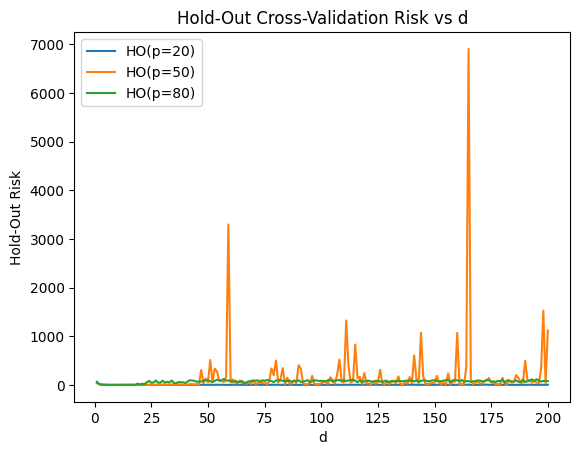

In [108]:
from sklearn.model_selection import train_test_split

def hold_out_cv(X, Y, p):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=p/n)
    model.fit(X_train, Y_train)
    theta_hat = model.coef_
    return empirical_risk(X_test, Y_test, theta_hat)

ho_risks_20 = [hold_out_cv(X[:, :d], Y, 20) for d in range(1, 201)]
ho_risks_50 = [hold_out_cv(X[:, :d], Y, 50) for d in range(1, 201)]
ho_risks_80 = [hold_out_cv(X[:, :d], Y, 80) for d in range(1, 201)]

plt.plot(range(1, 201), ho_risks_20, label='HO(p=20)')
plt.plot(range(1, 201), ho_risks_50, label='HO(p=50)')
plt.plot(range(1, 201), ho_risks_80, label='HO(p=80)')
plt.xlabel('d')
plt.ylabel('Hold-Out Risk')
plt.title('Hold-Out Cross-Validation Risk vs d')
plt.legend()
plt.show()


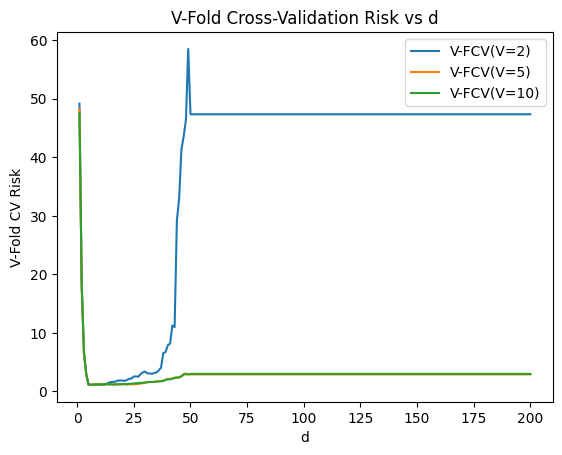

In [109]:
from sklearn.model_selection import cross_val_score

def v_fold_cv(X, Y, V):
    model = LinearRegression(fit_intercept=True)
    scores = cross_val_score(model, X, Y, cv=V, scoring='neg_mean_squared_error')
    return -np.mean(scores)

vcv_risks_2 = [v_fold_cv(X[:, :d], Y, 2) for d in range(1, 201)]
vcv_risks_5 = [v_fold_cv(X[:, :d], Y, 5) for d in range(1, 201)]
vcv_risks_10 = [v_fold_cv(X[:, :d], Y, 10) for d in range(1, 201)]

plt.plot(range(1, 201), vcv_risks_2, label='V-FCV(V=2)')
plt.plot(range(1, 201), vcv_risks_5, label='V-FCV(V=5)')
plt.plot(range(1, 201), vcv_risks_10, label='V-FCV(V=10)')
plt.xlabel('d')
plt.ylabel('V-Fold CV Risk')
plt.title('V-Fold Cross-Validation Risk vs d')
plt.legend()
plt.show()
